<a href="https://colab.research.google.com/github/BharathiVetukuri/CMPE-256_Asgn2_Feature-Engineering-Unstructured-Data/blob/main/FeatureEngUnstructuredData_Kepler_Star_KIC12268220C_Light_Curve_Waves_to_Sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install librosa
!pip3 install numba>=0.53

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "/content/578358main_kepler_star_KIC12268220C.mp3"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(155056,) 22050


In [ ]:
librosa.load(audio_data, sr=44100)

(array([ 4.0354620e-10,  5.7765237e-10,  2.9233271e-10, ...,
        -2.0171693e-02, -2.2792086e-02,  0.0000000e+00], dtype=float32),
 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

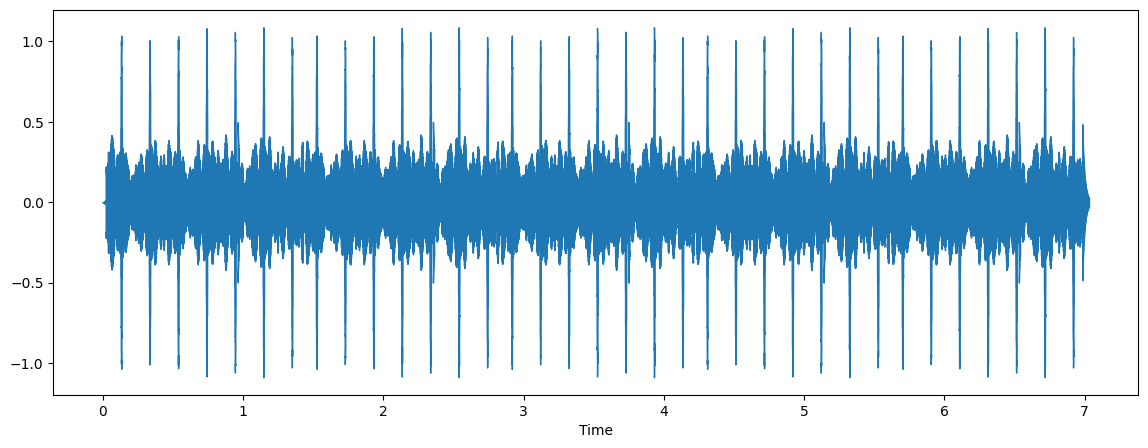

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

# **Short-time Fourier transform (STFT)**

In [ ]:
#https://librosa.org/doc-playground/main/generated/librosa.feature.chroma_stft.html?highlight=ibrosa%20feature%20chroma_stft#librosa.feature.chroma_stft
#Energy
librosa.feature.chroma_stft(y=x, sr=sr)

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.8811363 ],
       [0.5989229 , 0.28312474, 0.19532259, ..., 0.38664067, 0.7775551 ,
        0.92881393],
       [0.25886604, 0.06828175, 0.02138191, ..., 0.20678638, 0.64988524,
        0.9740127 ],
       ...,
       [0.19836926, 0.05788017, 0.0286102 , ..., 0.20303538, 0.5664512 ,
        0.90492517],
       [0.20076908, 0.15065752, 0.24496542, ..., 0.45466027, 0.5978929 ,
        0.85558015],
       [0.54818815, 0.5775217 , 0.56433856, ..., 0.73440933, 0.8298224 ,
        0.82038623]], dtype=float32)

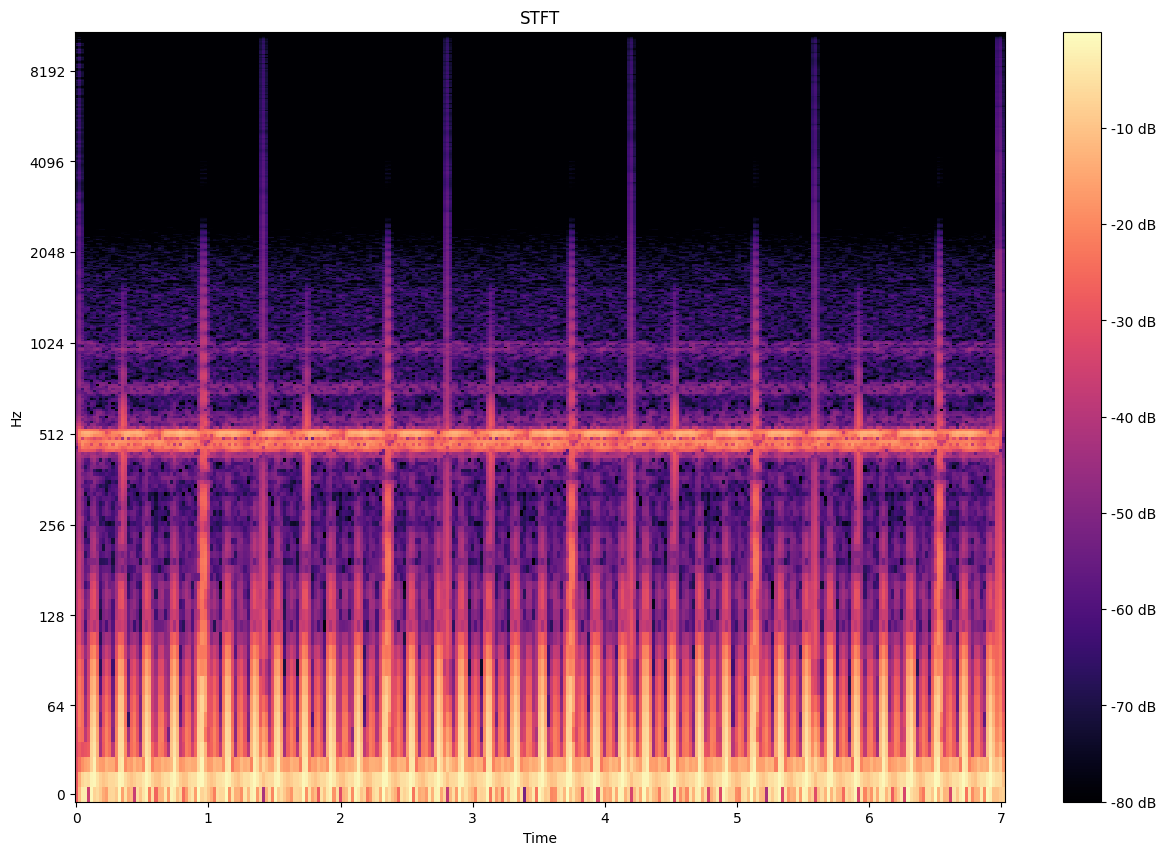

In [ ]:
stft_result = librosa.stft(y=x)

stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()

# **MFCCs**

(20, 303)


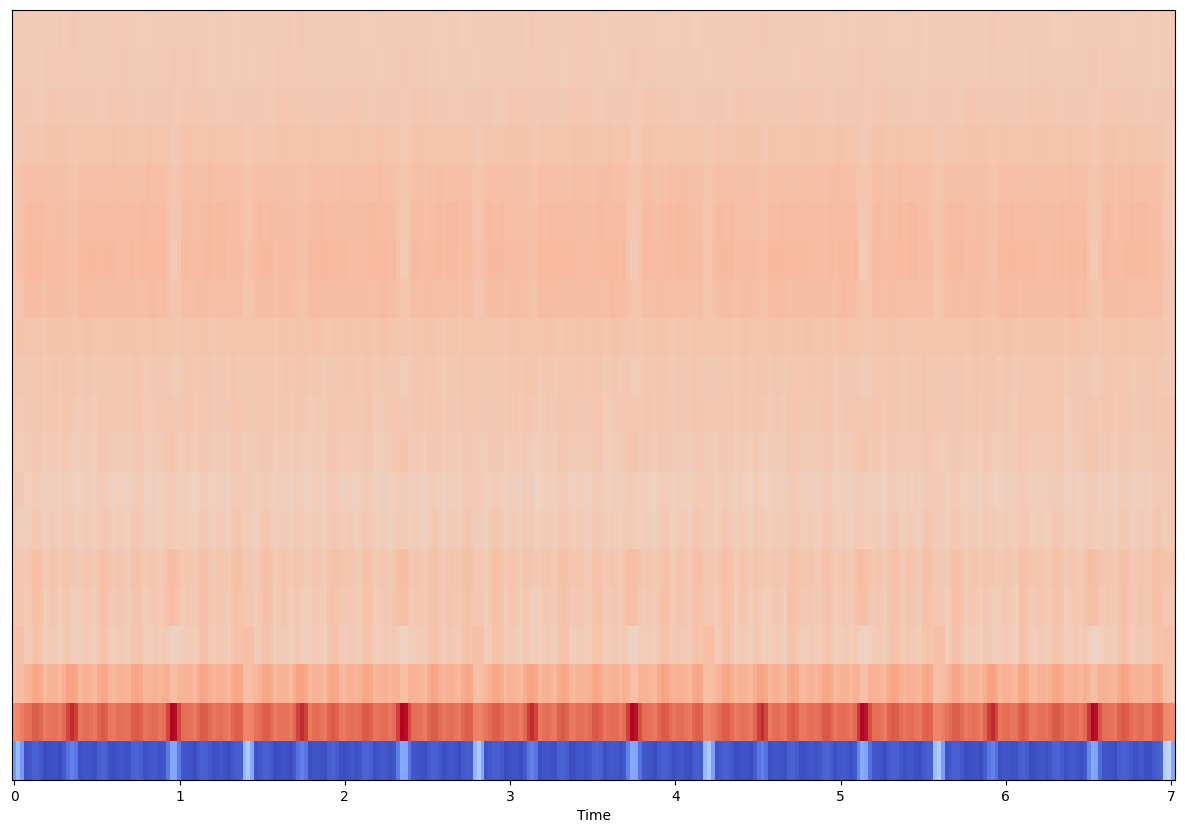

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
mfccs

array([[-2.6236493e+02, -2.0015802e+02, -2.6578299e+02, ...,
        -1.4855527e+02, -1.2246020e+02, -2.4073140e+02],
       [ 1.1271478e+02,  1.2050728e+02,  1.3274704e+02, ...,
         1.2149130e+02,  1.1659863e+02,  1.1142892e+02],
       [ 2.6886950e+01,  2.8958977e+01,  3.3986534e+01, ...,
         2.3877289e+01,  2.0789351e+01,  1.8070061e+01],
       ...,
       [ 3.9143505e+00,  6.6300869e+00,  6.7513618e+00, ...,
         4.9423227e+00,  3.8032861e+00,  4.1211576e+00],
       [-3.8028564e+00, -4.1692615e+00, -3.0025787e+00, ...,
        -3.4198754e+00, -3.0159371e+00, -1.0216737e-01],
       [-2.2293177e+00, -2.6908717e+00, -2.5875235e+00, ...,
        -1.4413047e+00,  5.6179142e-01,  4.9152770e+00]], dtype=float32)

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

(20, 303)


In [ ]:
mfccs

array([[-2.6236493e+02, -2.0015802e+02, -2.6578299e+02, ...,
        -1.4855527e+02, -1.2246020e+02, -2.4073140e+02],
       [ 1.1271478e+02,  1.2050728e+02,  1.3274704e+02, ...,
         1.2149130e+02,  1.1659863e+02,  1.1142892e+02],
       [ 2.6886950e+01,  2.8958977e+01,  3.3986534e+01, ...,
         2.3877289e+01,  2.0789351e+01,  1.8070061e+01],
       ...,
       [ 3.9143505e+00,  6.6300869e+00,  6.7513618e+00, ...,
         4.9423227e+00,  3.8032861e+00,  4.1211576e+00],
       [-3.8028564e+00, -4.1692615e+00, -3.0025787e+00, ...,
        -3.4198754e+00, -3.0159371e+00, -1.0216737e-01],
       [-2.2293177e+00, -2.6908717e+00, -2.5875235e+00, ...,
        -1.4413047e+00,  5.6179142e-01,  4.9152770e+00]], dtype=float32)

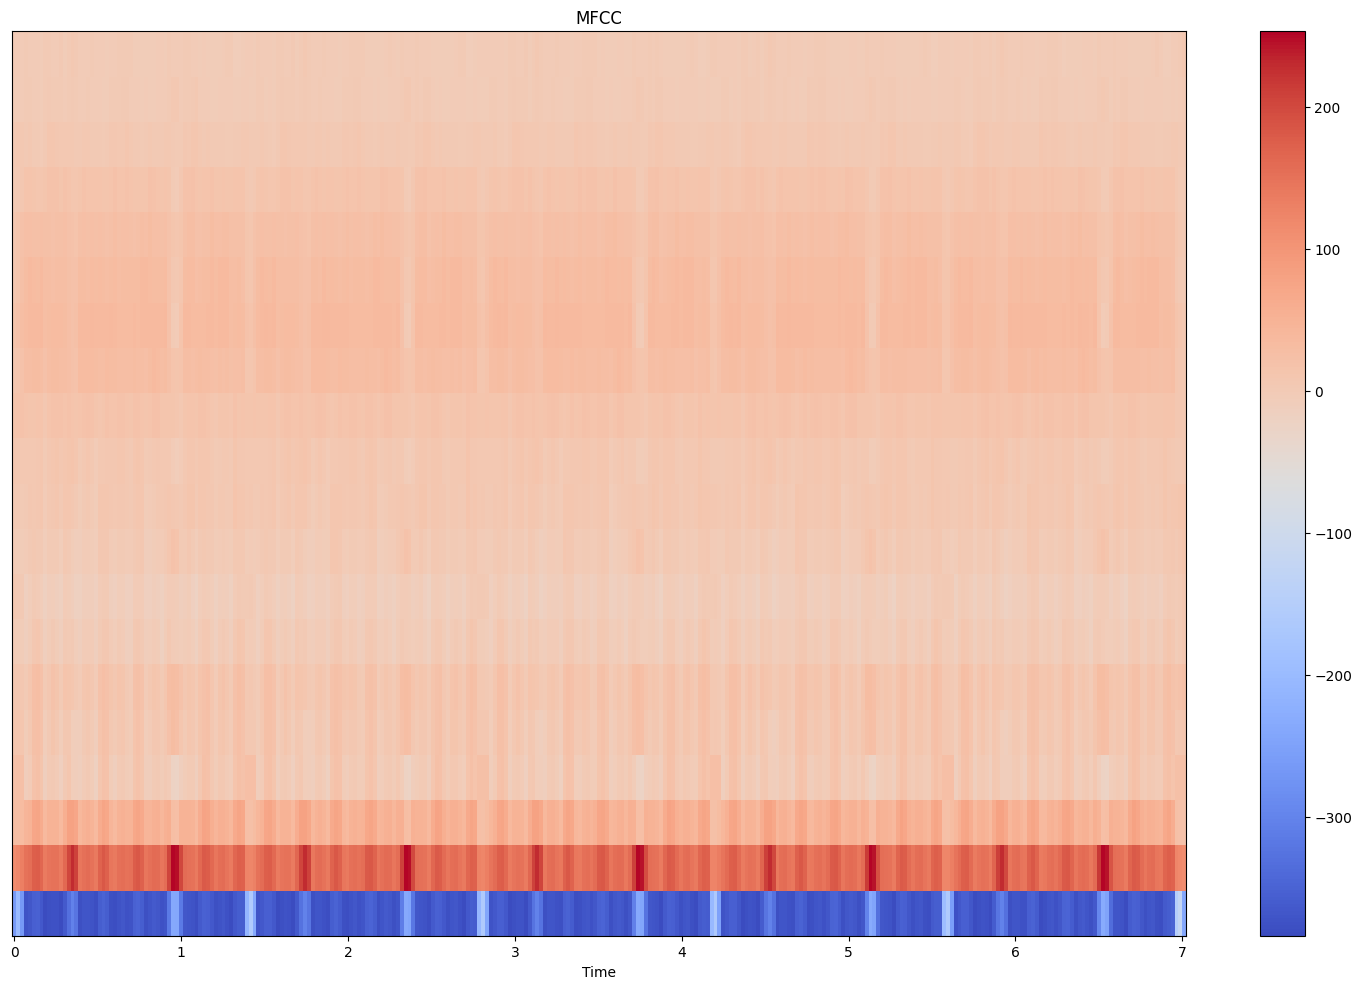

In [ ]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

# **Spectrogram**

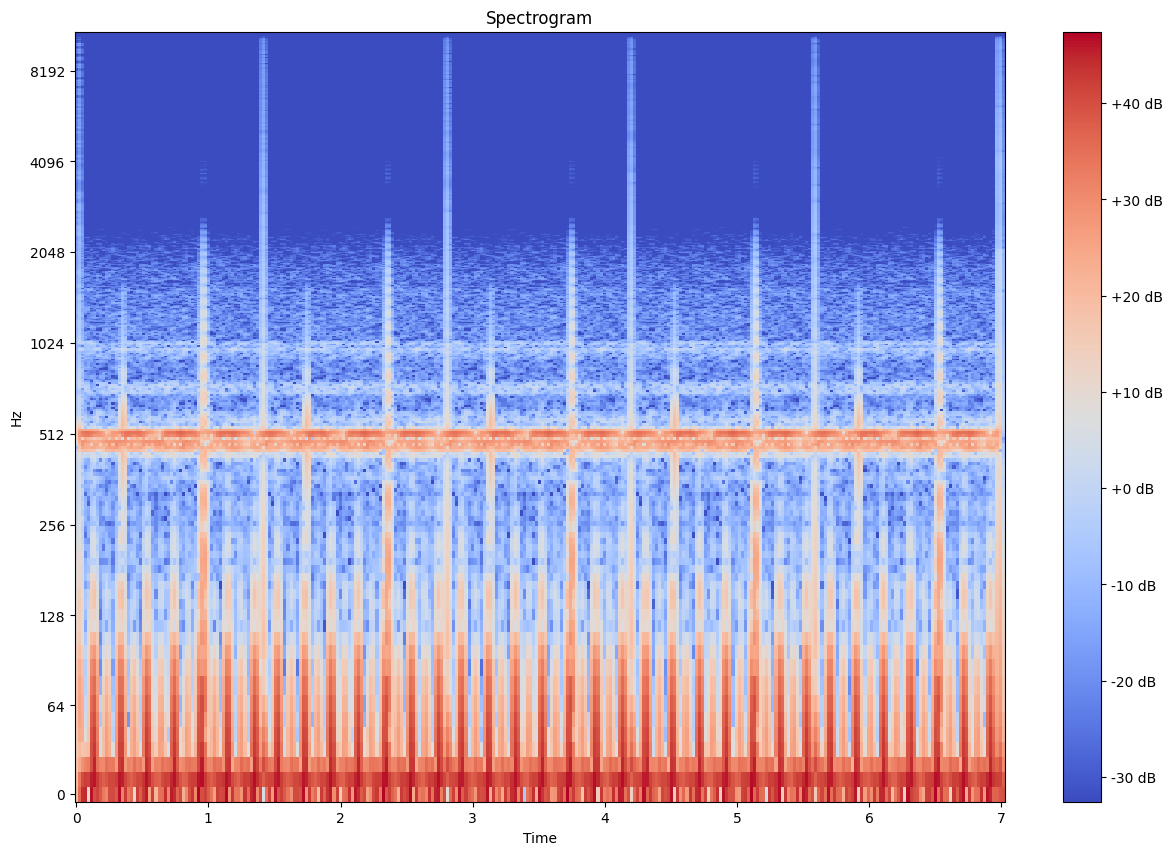

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [ ]:
X

array([[ 9.3262625e+00+0.0000000e+00j,  6.3176949e+01+0.0000000e+00j,
         1.5853749e+02+0.0000000e+00j, ...,
         7.1308159e+01+0.0000000e+00j, -9.0051170e+01+0.0000000e+00j,
        -9.7265755e+01+0.0000000e+00j],
       [ 2.0501845e+00+8.3961821e+00j, -1.9181683e+01+4.2875149e+01j,
        -9.1907761e+01+5.0733608e+01j, ...,
        -7.4171448e+01-9.8352867e+01j,  1.0401592e+02-6.0754459e+01j,
         4.6498299e+01+5.5754265e+01j],
       [-6.4911366e+00+2.5720842e+00j, -1.2471181e+01-9.3131161e+00j,
         1.2001518e+01-2.4563940e+01j, ...,
         6.1497253e+01+2.8583351e+01j, -9.1293564e+01+2.4340750e+01j,
         2.0603958e+01-2.4258635e+01j],
       ...,
       [-3.7022500e-07-5.0103745e-07j,  7.4111335e-07-2.6027440e-08j,
        -2.7095277e-07+4.0247653e-07j, ...,
        -2.0354980e-07-4.8486044e-07j,  2.4280667e-05-1.0635253e-05j,
        -1.1988924e-03+5.6274235e-04j],
       [ 2.9918016e-07+9.5061395e-08j,  6.1227631e-08+1.5677553e-08j,
         3.8206224e-07

In [ ]:
Xdb

array([[ 19.394152,  36.011173,  44.00264 , ...,  37.062786,  39.089787,
         39.7592  ],
       [ 18.733154,  33.436478,  40.42218 , ...,  41.8112  ,  41.6168  ,
         37.218624],
       [ 16.87979 ,  23.842897,  28.735668, ...,  36.626556,  39.50705 ,
         30.056114],
       ...,
       [-32.573658, -32.573658, -32.573658, ..., -32.573658, -32.573658,
        -32.573658],
       [-32.573658, -32.573658, -32.573658, ..., -32.573658, -32.573658,
        -32.573658],
       [-32.573658, -32.573658, -32.573658, ..., -32.573658, -32.573658,
        -32.573658]], dtype=float32)

# **Chromagram**

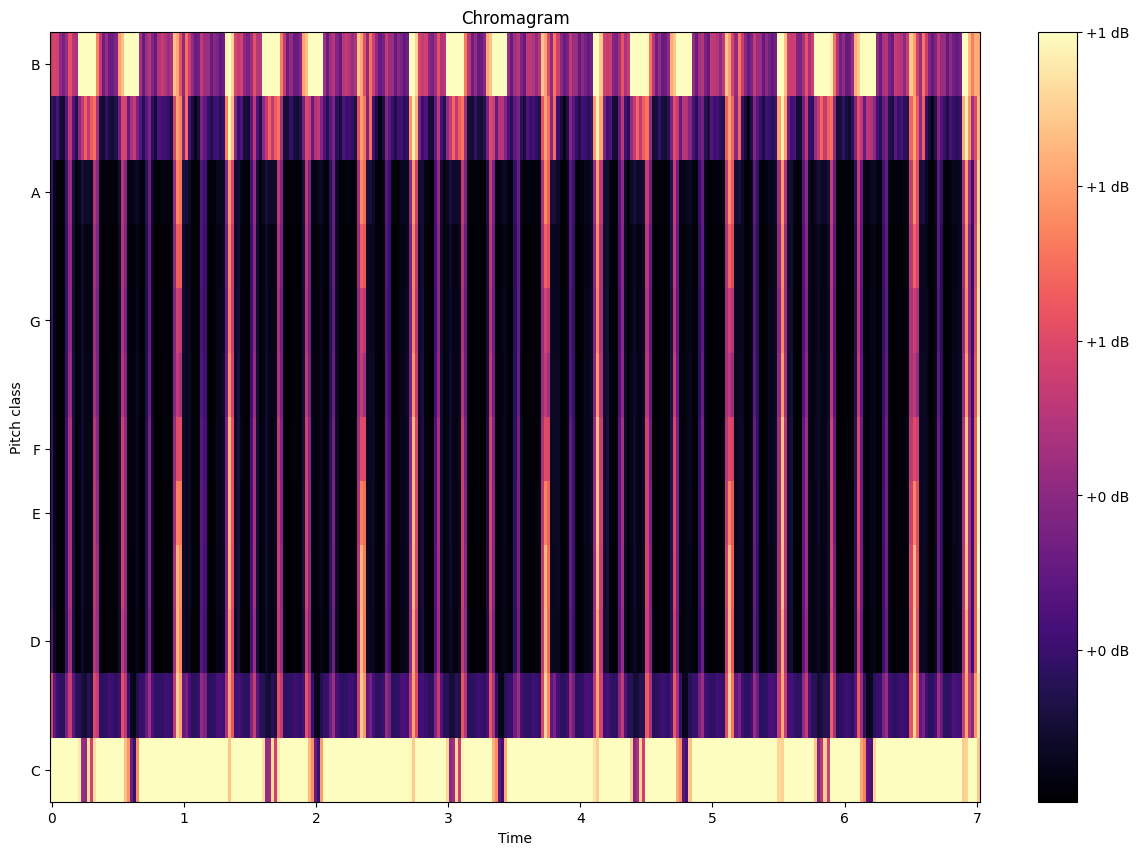

In [ ]:
chroma_db = librosa.feature.chroma_stft(y=x, sr=sr)

plt.figure(figsize=(15, 10))
librosa.display.specshow(chroma_db, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Chromagram')
plt.show()

In [ ]:
chroma_db

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.8811363 ],
       [0.5989229 , 0.28312474, 0.19532259, ..., 0.38664067, 0.7775551 ,
        0.92881393],
       [0.25886604, 0.06828175, 0.02138191, ..., 0.20678638, 0.64988524,
        0.9740127 ],
       ...,
       [0.19836926, 0.05788017, 0.0286102 , ..., 0.20303538, 0.5664512 ,
        0.90492517],
       [0.20076908, 0.15065752, 0.24496542, ..., 0.45466027, 0.5978929 ,
        0.85558015],
       [0.54818815, 0.5775217 , 0.56433856, ..., 0.73440933, 0.8298224 ,
        0.82038623]], dtype=float32)

# **Mel-Scaled Spectrogram**

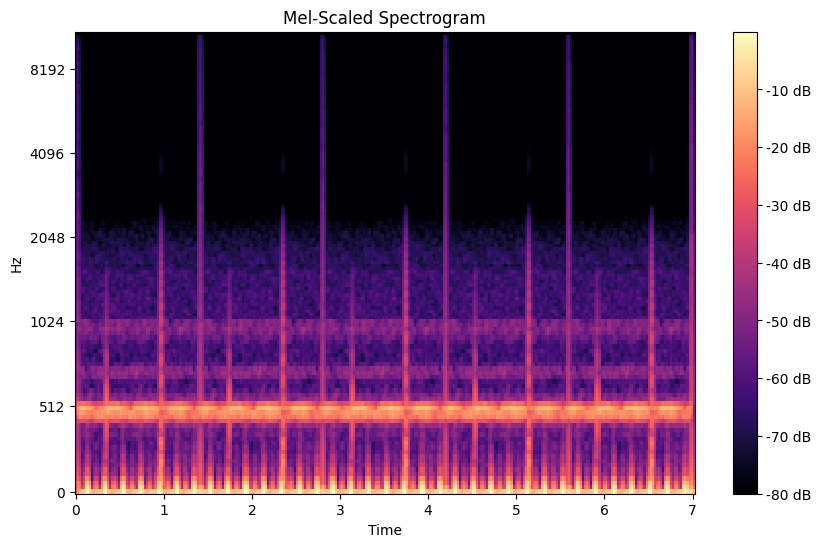

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)

mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Scaled Spectrogram')
plt.show()

In [ ]:
mel_spectrogram

array([[4.0755119e+00, 4.9570736e+01, 2.0643881e+02, ..., 4.3314868e+02,
        6.2186523e+02, 1.3207651e+02],
       [3.7264299e+00, 2.8279877e+01, 1.6180338e+01, ..., 4.8524940e+01,
        1.0476664e+02, 1.3030915e+01],
       [3.8961949e+00, 2.4408258e+01, 1.0783615e+01, ..., 2.0980267e+01,
        3.9536327e+01, 3.9571104e+00],
       ...,
       [1.9438817e-04, 5.6377571e-04, 1.0783761e-04, ..., 1.7114102e-03,
        3.1287842e-03, 2.9704630e-04],
       [1.4835600e-04, 2.7780578e-04, 3.9261944e-05, ..., 9.4307325e-04,
        1.7272759e-03, 1.6635834e-04],
       [1.2497708e-05, 2.2840904e-05, 3.1497223e-06, ..., 8.2289975e-05,
        1.5319433e-04, 1.5653817e-05]], dtype=float32)

In [ ]:
mel_spectrogram_db

array([[-28.062542 , -17.21211  , -11.016449 , ...,  -7.7979946,
         -6.2274   , -12.956108 ],
       [-28.451435 , -19.64959  , -22.074488 , ..., -17.304714 ,
        -13.962135 , -23.014614 ],
       [-28.257957 , -20.288996 , -23.83672  , ..., -20.946255 ,
        -18.1944   , -28.190582 ],
       ...,
       [-71.277664 , -66.653305 , -73.83666  , ..., -61.830822 ,
        -59.21061  , -69.43613  ],
       [-72.45131  , -69.72695  , -78.22465  , ..., -64.41891  ,
        -61.79075  , -71.95392  ],
       [-80.       , -80.       , -80.       , ..., -75.010895 ,
        -72.311935 , -80.       ]], dtype=float32)

# **Beat Tracker**

Detected Tempo: [135.99917763] BPM


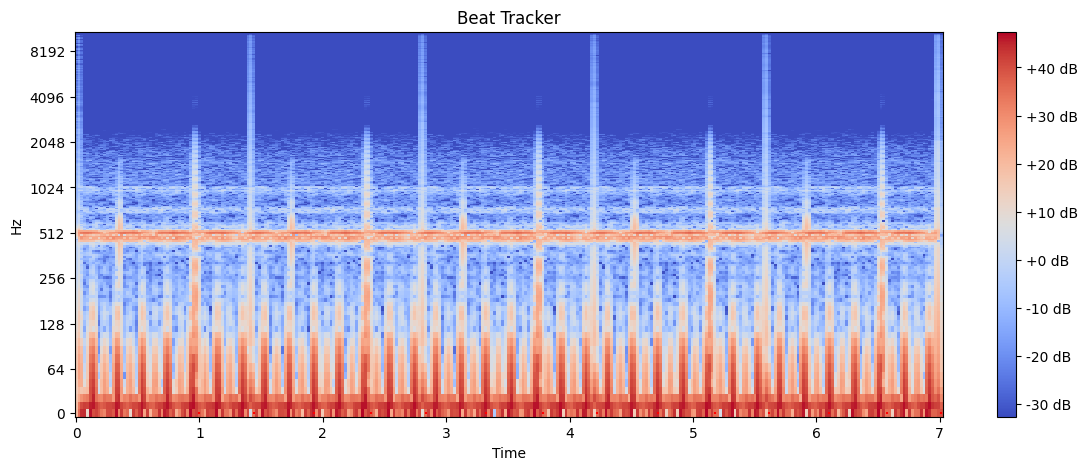

In [ ]:
tempo, beats = librosa.beat.beat_track(y=x, sr=sr)

print(f"Detected Tempo: {tempo} BPM")

# Plot beat locations on the waveform
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.vlines(librosa.frames_to_time(beats, sr=sr), -1, 1, color='r')
plt.colorbar(format='%+2.0f dB')
plt.title('Beat Tracker')
plt.show()

# **Constant-Q Transform**

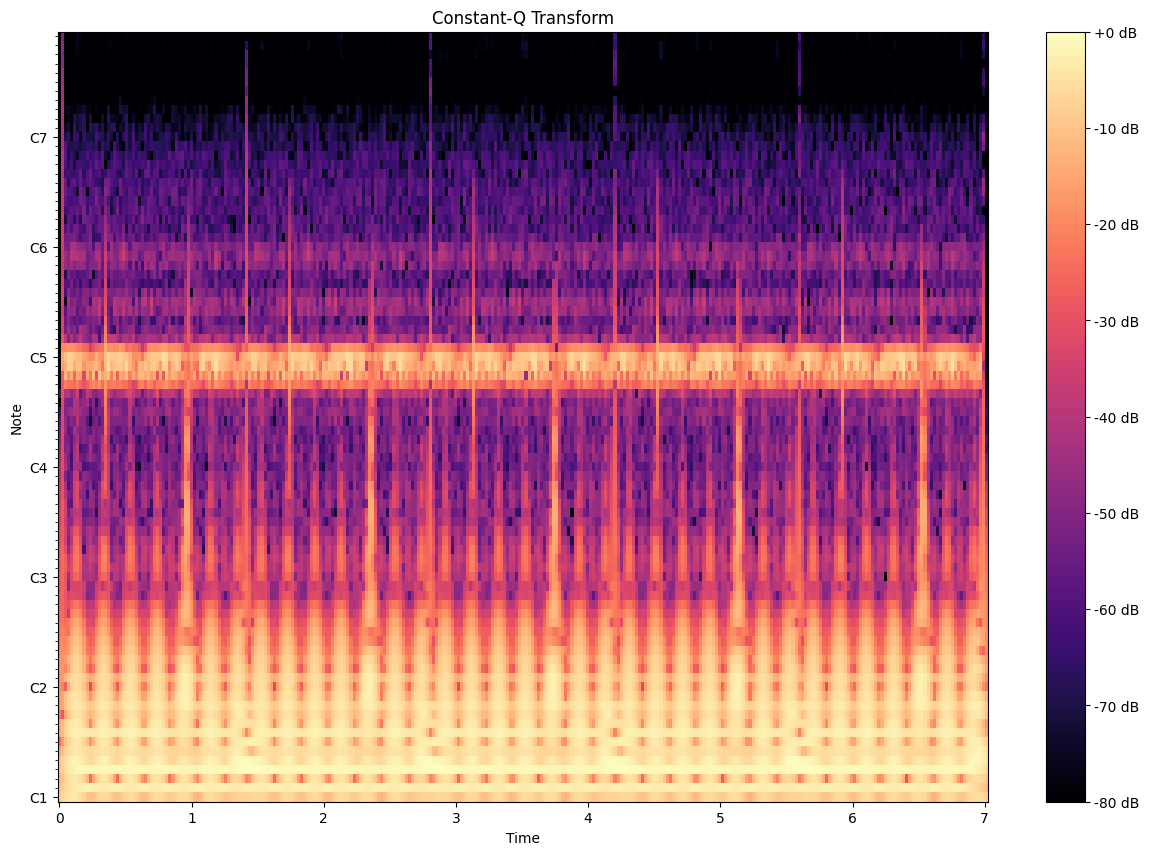

In [ ]:
CQT = librosa.cqt(y=x, sr=sr)

CQT_db = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(CQT_db, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform')
plt.show()

In [ ]:
CQT

array([[ 7.8532614e-02+1.43358219e+00j,  1.7915250e+00-6.56600222e-02j,
        -3.5379842e-02-2.11015654e+00j, ...,
         1.8720345e+00+6.28570616e-01j,  5.8696491e-01-1.70488560e+00j,
        -1.4918833e+00-4.79119301e-01j],
       [ 1.0982975e+00-1.06203124e-01j,  3.0142573e-01-1.42626202e+00j,
        -1.5323408e+00-8.85719299e-01j, ...,
         6.8036371e-01+1.32892740e+00j,  1.2431364e+00-1.84922606e-01j,
         1.7491698e-01-9.89033103e-01j],
       [-4.7819167e-01-7.72462606e-01j, -1.3148162e+00-1.65659115e-01j,
        -1.2538210e+00+1.20022595e+00j, ...,
        -7.9236484e-01+1.72160447e+00j,  6.5380079e-01+1.48330534e+00j,
         1.2290663e+00+4.19068336e-01j],
       ...,
       [ 1.6498393e-07-2.08630055e-07j,  1.2753770e-02+3.19804414e-03j,
        -2.3745302e-04-1.18833392e-04j, ...,
         3.9086135e-05+6.36287950e-05j,  9.6260925e-04-4.06092353e-04j,
         7.1862778e-06-1.06341495e-05j],
       [-2.0626024e-07+3.18507460e-07j, -4.0588513e-04+1.70847401e-0

In [ ]:
CQT_db

array([[ -8.442252 ,  -6.5134306,  -5.096204 , ...,  -5.673501 ,
         -6.463331 ,  -7.682725 ],
       [-10.728898 ,  -8.309964 ,  -6.624716 , ...,  -8.102728 ,
         -9.5982895, -11.545744 ],
       [-12.4172535,  -9.138016 ,  -6.79429  , ...,  -6.0306396,
         -7.388043 ,  -9.314571 ],
       ...,
       [-80.       , -49.206116 , -80.       , ..., -80.       ,
        -71.20337  , -80.       ],
       [-80.       , -46.9291   , -80.       , ..., -80.       ,
        -64.36645  , -80.       ],
       [-80.       , -49.410416 , -80.       , ..., -80.       ,
        -68.85935  , -80.       ]], dtype=float32)